In [ ]:
#Milestone-4

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [2]:
#Loading dataset
file_path = r"C:\Users\Akshaya\OneDrive\Desktop\VI\processed_eq_soil_merged.csv"
df = pd.read_csv(file_path)

In [3]:
df.shape

(1048575, 16)

In [4]:
df.dtypes

latitude_x         float64
depth              float64
place                int64
longitude_x        float64
risk_category        int64
year                 int64
month                int64
day                  int64
lat_lon_product    float64
depth_squared      float64
month_sin          float64
month_cos          float64
region_cluster       int64
depth_log          float64
lat_diff           float64
lon_diff           float64
dtype: object

In [5]:
print(df.isnull().sum())

latitude_x         0
depth              0
place              0
longitude_x        0
risk_category      0
year               0
month              0
day                0
lat_lon_product    0
depth_squared      0
month_sin          0
month_cos          0
region_cluster     0
depth_log          0
lat_diff           0
lon_diff           0
dtype: int64


In [6]:
print(df.duplicated().sum())

3668


In [7]:
df = df.drop_duplicates()

In [8]:
print(df.duplicated().sum())

0


In [9]:
df.shape

(1044907, 16)

In [10]:
X = df.drop("risk_category", axis=1)
y = df["risk_category"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

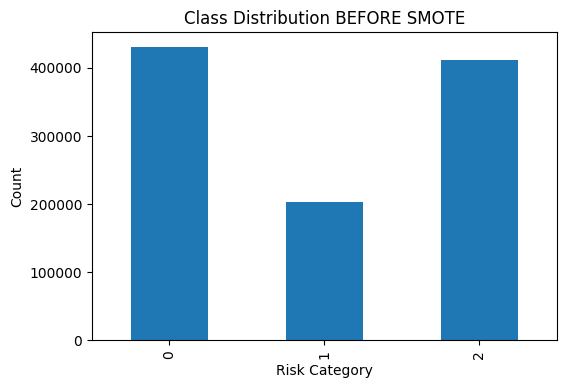

In [12]:
plt.figure(figsize=(6,4))
y.value_counts().sort_index().plot(kind='bar')
plt.title("Class Distribution BEFORE SMOTE")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

In [13]:
#SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [14]:
print("Original training set shape:", X_train.shape)

Original training set shape: (835925, 15)


In [15]:
print("Resampled training set shape:", X_train_resampled.shape)

Resampled training set shape: (1033986, 15)


In [16]:
print(y_train_resampled.value_counts())

risk_category
0    344662
2    344662
1    344662
Name: count, dtype: int64


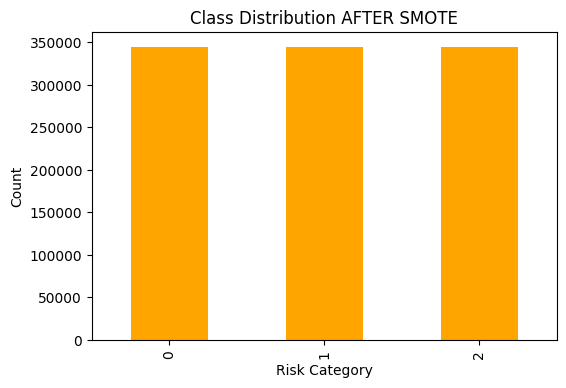

In [17]:
plt.figure(figsize=(6,4))
y_train_resampled.value_counts().sort_index().plot(kind='bar', color='orange')
plt.title("Class Distribution AFTER SMOTE")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

In [18]:
df["lat_lon_sum"] = df["latitude_x"] + df["longitude_x"]
df["lat_lon_diff_abs"] = abs(df["lat_diff"]) + abs(df["lon_diff"])
df["depth_sin"] = np.sin(df["depth"])
df["depth_cos"] = np.cos(df["depth"])
df["year_sin"] = np.sin(2 * np.pi * (df["year"] - df["year"].min()) / (df["year"].max() - df["year"].min()))
df["year_cos"] = np.cos(2 * np.pi * (df["year"] - df["year"].min()) / (df["year"].max() - df["year"].min()))

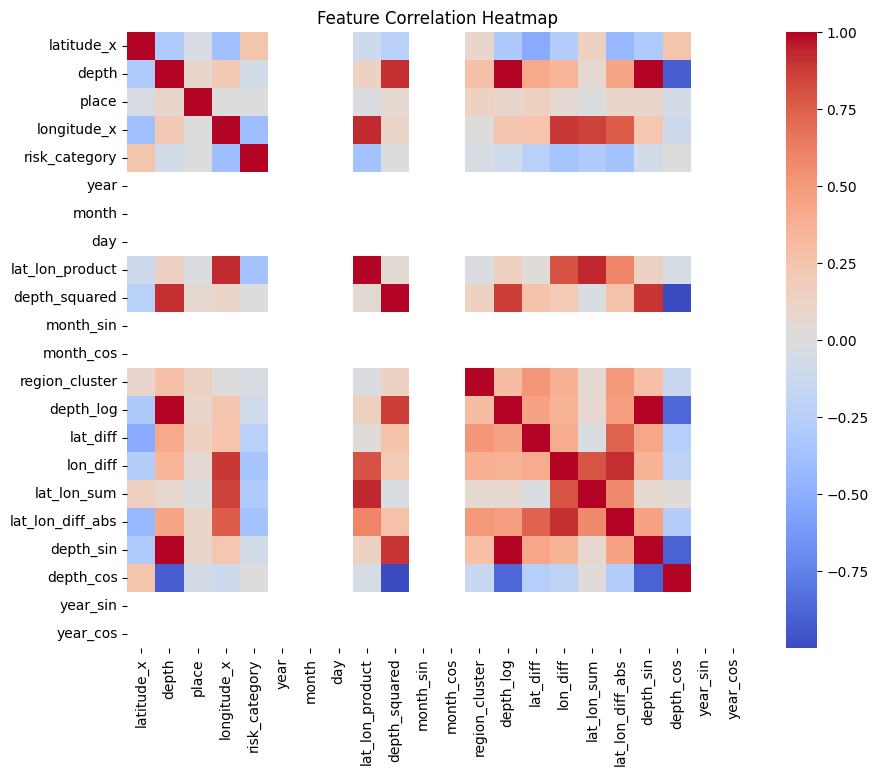

In [19]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Highly correlated features to drop:", high_corr_features)

df_reduced = df.drop(columns=high_corr_features)

Highly correlated features to drop: ['lat_lon_product', 'depth_squared', 'depth_log', 'lat_lon_sum', 'lat_lon_diff_abs', 'depth_sin', 'depth_cos']


In [21]:
drop_cols = [
    'lat_lon_product', 'depth_squared', 'depth_log',
    'lat_lon_sum', 'lat_lon_diff_abs', 'depth_sin', 'depth_cos'
]
df_reduced = df.drop(columns=drop_cols)
print("Remaining columns after removing multicollinear features:")
print(df_reduced.columns)

Remaining columns after removing multicollinear features:
Index(['latitude_x', 'depth', 'place', 'longitude_x', 'risk_category', 'year',
       'month', 'day', 'month_sin', 'month_cos', 'region_cluster', 'lat_diff',
       'lon_diff', 'year_sin', 'year_cos'],
      dtype='object')


In [22]:
X = df_reduced.drop("risk_category", axis=1)
y = df_reduced["risk_category"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
print("Missing values per column:")
print(X_train.isnull().sum())

Missing values per column:
latitude_x             0
depth                  0
place                  0
longitude_x            0
year                   0
month                  0
day                    0
month_sin              0
month_cos              0
region_cluster         0
lat_diff               0
lon_diff               0
year_sin          835925
year_cos          835925
dtype: int64


In [25]:
# Drop problematic columns
X_train = X_train.drop(columns=['year_sin', 'year_cos'])
X_test = X_test.drop(columns=['year_sin', 'year_cos'])

In [26]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [27]:
print(X_train_res.shape, y_train_res.shape)
print(y_train_res.value_counts())

(1033986, 12) (1033986,)
risk_category
0    344662
2    344662
1    344662
Name: count, dtype: int64


In [28]:
df_reduced.shape

(1044907, 15)

In [29]:
df_reduced.dtypes

latitude_x        float64
depth             float64
place               int64
longitude_x       float64
risk_category       int64
year                int64
month               int64
day                 int64
month_sin         float64
month_cos         float64
region_cluster      int64
lat_diff          float64
lon_diff          float64
year_sin          float64
year_cos          float64
dtype: object

In [30]:
print(y_train_res.value_counts())

risk_category
0    344662
2    344662
1    344662
Name: count, dtype: int64


In [90]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.9,
    gamma=0.3,
    min_child_weight=3,
    eval_metric='mlogloss',
    random_state=42
)

In [91]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

In [93]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    random_state=42,
    verbose=0
)

In [94]:
from sklearn.ensemble import StackingClassifier 
from sklearn.linear_model import LogisticRegression
stack_model = StackingClassifier(
    estimators=[
        ('xgb', xgb),
        ('lgb', lgb),
        ('cat', cat)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=3,
    n_jobs=-1
)

In [95]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
stack_model.fit(X_train_res, y_train_res)
y_pred = stack_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [96]:
print("Stacked Model Accuracy:", round(acc * 100, 2), "%")  

Stacked Model Accuracy: 66.1 %


In [97]:
df_reduced['depth_log'] = np.log1p(df_reduced['depth'])
df_reduced['lat_lon_product'] = df_reduced['latitude_x'] * df_reduced['longitude_x']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
estimators = [
    ('xgb', xgb),
    ('lgb', lgb),
    ('cat', cat),
    ('rf', RandomForestClassifier(n_estimators=300, random_state=42))
]


In [99]:
StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=3,
    stack_method='predict_proba'
)

,estimators,"[('xgb', ...), ('lgb', ...), ...]"
,final_estimator,LogisticRegre...max_iter=1000)
,cv,3
,stack_method,'predict_proba'
,n_jobs,None
,passthrough,False
,verbose,0
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None


In [100]:
from sklearn.pipeline import make_pipeline
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    cv=3,
    stack_method='predict_proba'
)


In [101]:
#XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 700),
        'max_depth': trial.suggest_int('max_depth', 6, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 2),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }
    model = XGBClassifier(**params, eval_metric='mlogloss', random_state=42)
    score = cross_val_score(model, X_train_res, y_train_res, cv=3, scoring='accuracy').mean()
    return score
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
print("Best params:", study.best_params)

[I 2025-11-06 18:51:05,605] A new study created in memory with name: no-name-023315b5-08f9-448a-bc5f-5527d3848e53
[I 2025-11-06 18:54:35,792] Trial 0 finished with value: 0.684857435207053 and parameters: {'n_estimators': 535, 'max_depth': 10, 'learning_rate': 0.04775884448264865, 'subsample': 0.7378967016173754, 'colsample_bytree': 0.9884403495599808, 'gamma': 0.2930063859287253, 'min_child_weight': 2}. Best is trial 0 with value: 0.684857435207053.
[I 2025-11-06 18:56:24,006] Trial 1 finished with value: 0.6774782250436658 and parameters: {'n_estimators': 553, 'max_depth': 11, 'learning_rate': 0.08472306667491494, 'subsample': 0.9563353421146342, 'colsample_bytree': 0.760839634185919, 'gamma': 1.516098893490014, 'min_child_weight': 2}. Best is trial 0 with value: 0.684857435207053.
[I 2025-11-06 19:04:48,926] Trial 2 finished with value: 0.6795798008870526 and parameters: {'n_estimators': 604, 'max_depth': 11, 'learning_rate': 0.0459171245259923, 'subsample': 0.7920098165560069, 'col

Best params: {'n_estimators': 486, 'max_depth': 12, 'learning_rate': 0.07985519326881187, 'subsample': 0.7438360065990754, 'colsample_bytree': 0.9264121675751896, 'gamma': 0.059608180794661125, 'min_child_weight': 5}


In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76     86166
           1       0.51      0.70      0.59     40594
           2       0.61      0.60      0.61     82222

    accuracy                           0.66    208982
   macro avg       0.65      0.67      0.65    208982
weighted avg       0.68      0.66      0.67    208982



In [38]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_res, y_train_res)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


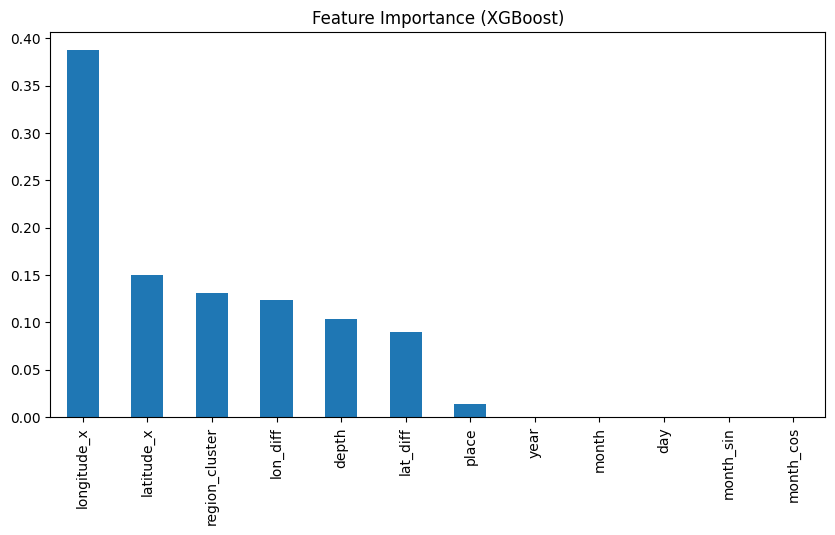

In [39]:
importance = pd.Series(xgb_model.feature_importances_, index=X_train_res.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance (XGBoost)")
plt.show()

In [40]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_train_res, y_train_res)
mi_series = pd.Series(mi, index=X_train_res.columns)
mi_series.sort_values(ascending=False)

place             0.318558
longitude_x       0.311405
lon_diff          0.298567
latitude_x        0.295667
lat_diff          0.276110
depth             0.268879
region_cluster    0.151512
month             0.087905
day               0.087822
year              0.059708
month_cos         0.058346
month_sin         0.043158
dtype: float64

In [42]:
selected_features = ['longitude_x', 'latitude_x', 'depth', 'region_cluster', 'place']

In [43]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

In [53]:
xgb.fit(X_train_res[selected_features], y_train_res)
y_pred_xgb = xgb.predict(X_test[selected_features])

c:\Users\Akshaya\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [19:22:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
print("XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Results
Accuracy: 0.6527787082141046
              precision    recall  f1-score   support

           0       0.85      0.67      0.75     86166
           1       0.49      0.71      0.58     40594
           2       0.61      0.60      0.60     82222

    accuracy                           0.65    208982
   macro avg       0.65      0.66      0.65    208982
weighted avg       0.68      0.65      0.66    208982



In [55]:
lgb = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [56]:
lgb.fit(X_train_res[selected_features], y_train_res)
y_pred_lgb = lgb.predict(X_test[selected_features])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 1033986, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


In [57]:
print("LightGBM")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

LightGBM
Accuracy: 0.6458116009991292
              precision    recall  f1-score   support

           0       0.85      0.66      0.74     86166
           1       0.48      0.71      0.57     40594
           2       0.60      0.60      0.60     82222

    accuracy                           0.65    208982
   macro avg       0.64      0.66      0.64    208982
weighted avg       0.68      0.65      0.65    208982



In [58]:
estimators = [
    ('xgb', xgb),
    ('lgb', lgb)
]
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

In [59]:
stack.fit(X_train_res[selected_features], y_train_res)
y_pred_stack = stack.predict(X_test[selected_features])

c:\Users\Akshaya\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [19:24:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 1033986, number of used features: 5
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


c:\Users\Akshaya\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [19:25:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Akshaya\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [19:26:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Akshaya\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [19:27:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Akshaya\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [19:28:26] WARNING: 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 827188, number of used features: 5
[LightGBM] [Info] Start training from score -1.098613
[LightGBM] [Info] Start training from score -1.098613
[LightGBM] [Info] Start training from score -1.098610
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 827189, number of used features: 5
[LightGBM] [Info] Start training from score -1.098615
[LightGBM] [Info] Start training from score -1.098611
[LightGBM] [Info] Start training from score -1.098611
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018478 sec

In [61]:
print("Stacking Model")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))

Stacking Model
Accuracy: 0.6572192820434296
              precision    recall  f1-score   support

           0       0.83      0.69      0.76     86166
           1       0.50      0.70      0.58     40594
           2       0.61      0.60      0.61     82222

    accuracy                           0.66    208982
   macro avg       0.65      0.66      0.65    208982
weighted avg       0.68      0.66      0.66    208982



In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [37]:
#MLP
mlp = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

In [38]:
mlp.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = mlp.fit(
    X_train_scaled, y_train_res,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[es],
    verbose=1
)

Epoch 1/50
3232/3232 [==============================] - 10s 3ms/step - loss: 0.8217 - accuracy: 0.6090 - val_loss: 1.0144 - val_accuracy: 0.5008
Epoch 2/50
3232/3232 [==============================] - 9s 3ms/step - loss: 0.7879 - accuracy: 0.6257 - val_loss: 1.0911 - val_accuracy: 0.3738
Epoch 3/50
3232/3232 [==============================] - 10s 3ms/step - loss: 0.7792 - accuracy: 0.6294 - val_loss: 1.0284 - val_accuracy: 0.3900
Epoch 4/50
3232/3232 [==============================] - 9s 3ms/step - loss: 0.7731 - accuracy: 0.6326 - val_loss: 1.1109 - val_accuracy: 0.3420
Epoch 5/50
3232/3232 [==============================] - 10s 3ms/step - loss: 0.7696 - accuracy: 0.6344 - val_loss: 1.1281 - val_accuracy: 0.3795
Epoch 6/50
3232/3232 [==============================] - 11s 3ms/step - loss: 0.7671 - accuracy: 0.6356 - val_loss: 1.1535 - val_accuracy: 0.3402


In [41]:
y_pred_prob = mlp.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

6531/6531 [==============================] - 5s 771us/step


In [42]:
print("MLP Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

MLP Results
Accuracy: 0.6145409652505958
              precision    recall  f1-score   support

           0       0.85      0.57      0.68     86166
           1       0.49      0.48      0.48     40594
           2       0.54      0.73      0.62     82222

    accuracy                           0.61    208982
   macro avg       0.62      0.59      0.59    208982
weighted avg       0.66      0.61      0.62    208982



In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_class_weight

In [48]:
file_path = r"C:\Users\Akshaya\OneDrive\Desktop\VI\processed_eq_soil_merged.csv"
df = pd.read_csv(file_path)

In [49]:
df = df.drop_duplicates()

In [50]:
# Feature engineering (already used in your version)
df["lat_lon_sum"] = df["latitude_x"] + df["longitude_x"]
df["lat_lon_diff_abs"] = abs(df["lat_diff"]) + abs(df["lon_diff"])
df["depth_sin"] = np.sin(df["depth"])
df["depth_cos"] = np.cos(df["depth"])
df["year_sin"] = np.sin(2 * np.pi * (df["year"] - df["year"].min()) / (df["year"].max() - df["year"].min()))
df["year_cos"] = np.cos(2 * np.pi * (df["year"] - df["year"].min()) / (df["year"].max() - df["year"].min()))

In [51]:
drop_cols = [
    'lat_lon_product', 'depth_squared', 'depth_log',
    'lat_lon_sum', 'lat_lon_diff_abs', 'depth_sin', 'depth_cos', 
    'year_sin', 'year_cos'
]
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

In [52]:
X = df.drop("risk_category", axis=1)
y = df["risk_category"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Balanced class:\n", y_train_res.value_counts())

Balanced class:
 risk_category
0    344662
2    344662
1    344662
Name: count, dtype: int64


In [55]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [56]:
class_weights = dict(enumerate(compute_class_weight('balanced', classes=np.unique(y_train_res), y=y_train_res)))
print("Class Weights:", class_weights)

Class Weights: {0: 1.0, 1: 1.0, 2: 1.0}


In [57]:
mlp = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(3, activation='softmax')  # 3 output classes
])

In [58]:
mlp.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [59]:
es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
history = mlp.fit(
    X_train_scaled, y_train_res,
    validation_split=0.2,
    epochs=60,
    batch_size=512,
    class_weight=class_weights,
    callbacks=[es],
    verbose=1
)

Epoch 1/60
1616/1616 [==============================] - 25s 15ms/step - loss: 0.8304 - accuracy: 0.6064 - val_loss: 1.1358 - val_accuracy: 0.3421
Epoch 2/60
1616/1616 [==============================] - 25s 16ms/step - loss: 0.7862 - accuracy: 0.6265 - val_loss: 1.0438 - val_accuracy: 0.3562
Epoch 3/60
1616/1616 [==============================] - 26s 16ms/step - loss: 0.7733 - accuracy: 0.6334 - val_loss: 1.0874 - val_accuracy: 0.3602
Epoch 4/60
1616/1616 [==============================] - 26s 16ms/step - loss: 0.7660 - accuracy: 0.6375 - val_loss: 1.0690 - val_accuracy: 0.3508
Epoch 5/60
1616/1616 [==============================] - 25s 16ms/step - loss: 0.7606 - accuracy: 0.6399 - val_loss: 1.0582 - val_accuracy: 0.3731
Epoch 6/60
1616/1616 [==============================] - 26s 16ms/step - loss: 0.7568 - accuracy: 0.6423 - val_loss: 1.0671 - val_accuracy: 0.3528
Epoch 7/60
1616/1616 [==============================] - 26s 16ms/step - loss: 0.7534 - accuracy: 0.6439 - val_loss: 1.0625 -

In [60]:
y_pred_prob = mlp.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)
acc = accuracy_score(y_test, y_pred)

6531/6531 [==============================] - 12s 2ms/step


In [61]:
print("MLP Accuracy:", acc)

MLP Accuracy: 0.6352126020422811


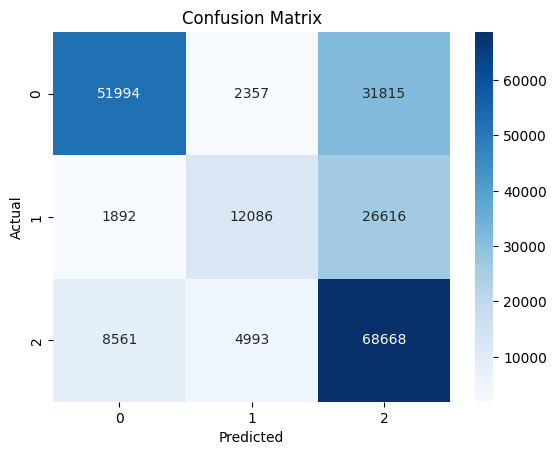

In [62]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [65]:
mlp = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
mlp.compile(
    optimizer=Adam(learning_rate=0.0007),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [66]:
es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
history = mlp.fit(
    X_train_scaled, y_train_res,
    validation_split=0.2,
    epochs=40,
    batch_size=512,
    callbacks=[es],
    verbose=1
)

Epoch 1/40
1616/1616 [==============================] - 11s 6ms/step - loss: 0.8132 - accuracy: 0.6126 - val_loss: 1.0063 - val_accuracy: 0.4399
Epoch 2/40
1616/1616 [==============================] - 10s 6ms/step - loss: 0.7803 - accuracy: 0.6291 - val_loss: 1.0740 - val_accuracy: 0.3517
Epoch 3/40
1616/1616 [==============================] - 9s 6ms/step - loss: 0.7692 - accuracy: 0.6349 - val_loss: 1.0908 - val_accuracy: 0.3527
Epoch 4/40
1616/1616 [==============================] - 14s 8ms/step - loss: 0.7620 - accuracy: 0.6385 - val_loss: 1.0427 - val_accuracy: 0.3720
Epoch 5/40
1616/1616 [==============================] - 31s 19ms/step - loss: 0.7575 - accuracy: 0.6412 - val_loss: 1.0659 - val_accuracy: 0.3584
Epoch 6/40
1616/1616 [==============================] - 15s 9ms/step - loss: 0.7543 - accuracy: 0.6427 - val_loss: 1.0235 - val_accuracy: 0.4198
Epoch 7/40
1616/1616 [==============================] - 10s 6ms/step - loss: 0.7511 - accuracy: 0.6434 - val_loss: 1.0549 - val_ac

In [67]:
mlp_train_pred = mlp.predict(X_train_scaled)
mlp_test_pred = mlp.predict(X_test_scaled)

6531/6531 [==============================] - 5s 739us/step


In [68]:
X_train_hybrid = np.hstack([X_train_scaled, mlp_train_pred])
X_test_hybrid = np.hstack([X_test_scaled, mlp_test_pred])

In [69]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
xgb.fit(X_train_hybrid, y_train_res)

c:\Users\Akshaya\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [15:41:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [70]:
y_pred = xgb.predict(X_test_hybrid)

In [71]:
print("Hybrid")
print("Accuracy:", accuracy_score(y_test, y_pred))

Hybrid
Accuracy: 0.6562431214171556


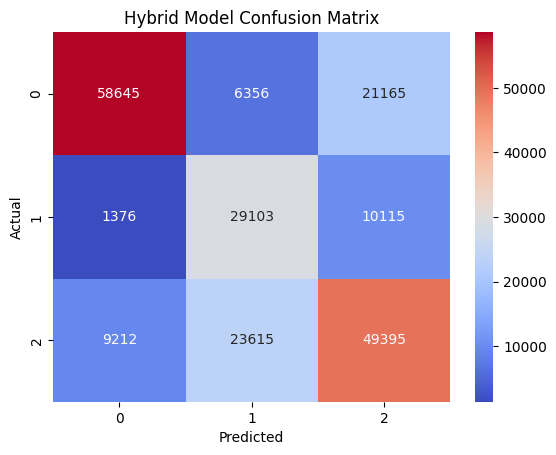

In [72]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Hybrid Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [105]:
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
#LSTM

In [108]:
file_path = r"C:\Users\Akshaya\OneDrive\Desktop\VI\Final_Risk_Assessment_Dataset.csv"
df = pd.read_csv(file_path)

In [109]:
le = LabelEncoder()
df["risk_category"] = le.fit_transform(df["risk_category"])

In [110]:
drop_cols = [
    "risk_score", "soil_score", "final_risk_index",
    "depth_risk_interaction", "depth_soil_interaction", "risk_dev"
]
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

In [111]:
df["time"] = pd.to_datetime(df["time"], unit="ms")
df["year"] = df["time"].dt.year
df["month"] = df["time"].dt.month
df["day"] = df["time"].dt.day
df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)
df["lat_lon_product"] = df["latitude_x"] * df["longitude_x"]
df["lat_lon_diff"] = abs(df["latitude_x"] - df["longitude_x"])
df = df.drop(columns=["time"], errors="ignore")

In [112]:
selected_features = [
    "latitude_x", "longitude_x", "depth", "geo_cluster", "tsunami",
    "SNUM", "SQKM", "DOMSOI", "year", "month", "day",
    "month_sin", "month_cos", "lat_lon_product", "lat_lon_diff"
]

In [113]:
X = df[selected_features]
y = df["risk_category"]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [116]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
X_train_lstm = np.expand_dims(X_train_scaled, axis=1)
X_test_lstm = np.expand_dims(X_test_scaled, axis=1)

In [118]:
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))),
    BatchNormalization(),
    Dropout(0.4),
    Bidirectional(LSTM(64)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(3, activation="softmax")  
])

In [119]:
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [120]:
es = EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True, verbose=1)
lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, verbose=1, min_lr=1e-5)

In [121]:
history = model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=512,
    callbacks=[es, lr],
    verbose=1
)

Epoch 1/20
1311/1311 [==============================] - 30s 18ms/step - loss: 0.8887 - accuracy: 0.5728 - val_loss: 0.8622 - val_accuracy: 0.5791 - lr: 5.0000e-04
Epoch 2/20
1311/1311 [==============================] - 23s 18ms/step - loss: 0.8328 - accuracy: 0.6013 - val_loss: 0.8201 - val_accuracy: 0.6164 - lr: 5.0000e-04
Epoch 3/20
1311/1311 [==============================] - 25s 19ms/step - loss: 0.8157 - accuracy: 0.6112 - val_loss: 0.7965 - val_accuracy: 0.6181 - lr: 5.0000e-04
Epoch 4/20
1311/1311 [==============================] - 25s 19ms/step - loss: 0.8034 - accuracy: 0.6201 - val_loss: 0.7784 - val_accuracy: 0.6359 - lr: 5.0000e-04
Epoch 5/20
1311/1311 [==============================] - 25s 19ms/step - loss: 0.7943 - accuracy: 0.6255 - val_loss: 0.7691 - val_accuracy: 0.6410 - lr: 5.0000e-04
Epoch 6/20
1311/1311 [==============================] - 25s 19ms/step - loss: 0.7885 - accuracy: 0.6291 - val_loss: 0.7965 - val_accuracy: 0.6209 - lr: 5.0000e-04
Epoch 7/20
1311/1311 [

In [122]:
y_pred_prob = model.predict(X_test_lstm)
y_pred = np.argmax(y_pred_prob, axis=1)
acc = accuracy_score(y_test, y_pred)

6554/6554 [==============================] - 12s 2ms/step


In [123]:
print(f"LSTM Accuracy: {acc*100:.2f}%")
print(classification_report(y_test, y_pred, target_names=le.classes_))

LSTM Accuracy: 65.45%
              precision    recall  f1-score   support

        High       0.79      0.69      0.74     86678
         Low       0.63      0.36      0.46     40610
      Medium       0.57      0.77      0.65     82427

    accuracy                           0.65    209715
   macro avg       0.66      0.60      0.62    209715
weighted avg       0.67      0.65      0.65    209715



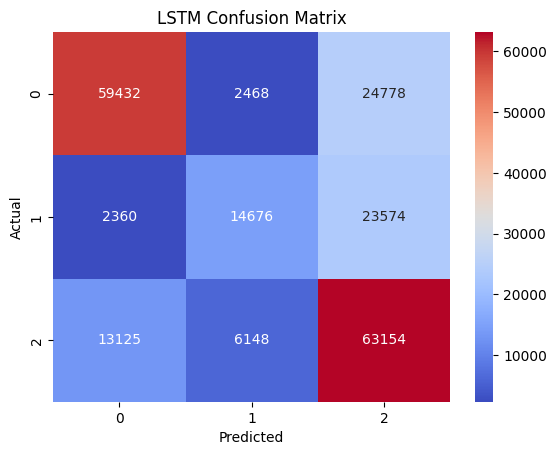

In [124]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("LSTM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

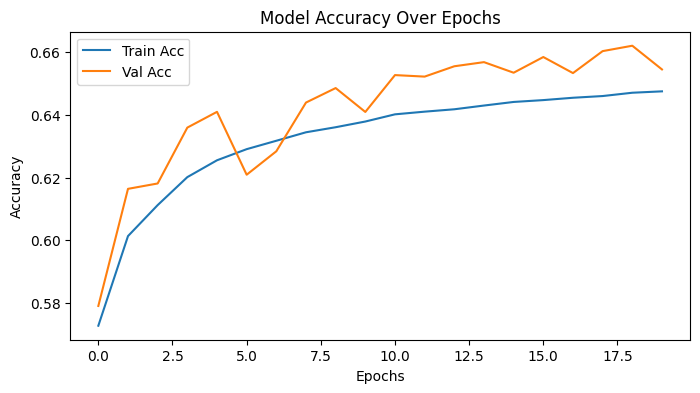

In [125]:
plt.figure(figsize=(8, 4))
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

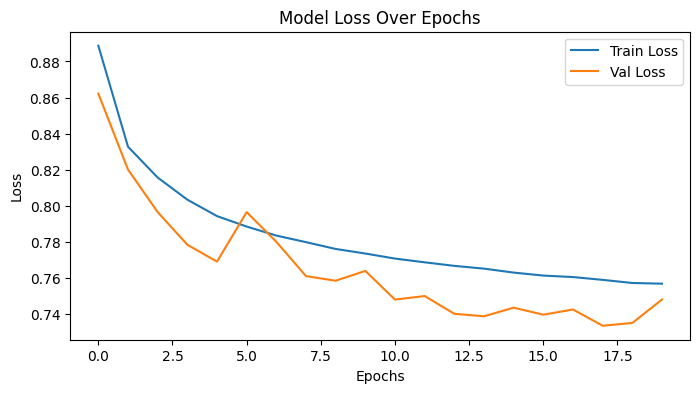

In [126]:
plt.figure(figsize=(8, 4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Model Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model.save("optimized_lstm_earthquake.h5")

In [135]:
from tab_transformer_pytorch import TabTransformer
import torch
from torch.utils.data import TensorDataset, DataLoader

In [136]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_encoded = LabelEncoder().fit_transform(y)

In [137]:
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

In [138]:
train_size = int(0.8 * len(X_tensor))
train_data = TensorDataset(X_tensor[:train_size], y_tensor[:train_size])
test_data = TensorDataset(X_tensor[train_size:], y_tensor[train_size:])

In [139]:
train_loader = DataLoader(train_data, batch_size=512, shuffle=True)
test_loader = DataLoader(test_data, batch_size=512)

In [ ]:
from tab_transformer_pytorch import TabTransformer
import torch
import torch.nn as nn

model = TabTransformer(
    categories = (),               
    num_continuous = len(X.columns),
    dim = 64,
    dim_out = 3,                   
    depth = 4,
    heads = 4,
    attn_dropout = 0.2,
    ff_dropout = 0.2
)
x_categ = torch.zeros((len(X), 0), dtype=torch.long)   
x_cont = torch.tensor(X.values, dtype=torch.float32)   
out = model(x_categ, x_cont)
print("Output shape:", out.shape)

Output shape: torch.Size([1048575, 3])


In [151]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0008)

In [156]:
for epoch in range(20):
    model.train()
    for xb, yb in train_loader:
        x_categ = torch.zeros((xb.size(0), 0), dtype=torch.long)  # dummy categorical input
        x_cont = xb  
        optimizer.zero_grad()
        preds = model(x_categ, x_cont)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/20, Loss: {loss.item():.4f}")

Epoch 1/20, Loss: 0.7915
Epoch 2/20, Loss: 0.7335
Epoch 3/20, Loss: 0.6831
Epoch 4/20, Loss: 0.8538
Epoch 5/20, Loss: 0.8191
Epoch 6/20, Loss: 0.7387
Epoch 7/20, Loss: 0.8379
Epoch 8/20, Loss: 0.7786
Epoch 9/20, Loss: 0.7890
Epoch 10/20, Loss: 0.7770
Epoch 11/20, Loss: 0.7412
Epoch 12/20, Loss: 0.7125
Epoch 13/20, Loss: 0.6611
Epoch 14/20, Loss: 0.7185
Epoch 15/20, Loss: 0.6923
Epoch 16/20, Loss: 0.7242
Epoch 17/20, Loss: 0.6828
Epoch 18/20, Loss: 0.8147
Epoch 19/20, Loss: 0.7265
Epoch 20/20, Loss: 0.7553


In [157]:
model.eval()
with torch.no_grad():
    preds, trues = [], []
    for xb, yb in test_loader:
        x_categ = torch.zeros((xb.size(0), 0), dtype=torch.long)
        x_cont = xb
        out = model(x_categ, x_cont)
        preds.extend(torch.argmax(out, 1).cpu().numpy())
        trues.extend(yb.cpu().numpy())

In [158]:
print("Transformer Accuracy:", accuracy_score(trues, preds))

Transformer Accuracy: 0.6132274753832583


In [ ]:
#Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report
from sklearn.ensemble import StackingRegressor, StackingClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
import joblib
from imblearn.over_sampling import SMOTE

In [2]:
file_path = r"C:\Users\Akshaya\OneDrive\Desktop\VI\Final_Risk_Assessment_Dataset.csv"
df = pd.read_csv(file_path)

In [3]:
print(df.shape)

(1048575, 14)


In [4]:
df = df.dropna()

In [5]:
print(df.shape)

(1048575, 14)


In [6]:
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [7]:
df.columns.tolist()

['time',
 'latitude_x',
 'depth',
 'geo_cluster',
 'place',
 'longitude_x',
 'tsunami',
 'risk_score',
 'soil_score',
 'SNUM',
 'SQKM',
 'DOMSOI',
 'final_risk_index',
 'risk_category']

In [8]:
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df.drop(columns=['time'], inplace=True)

In [9]:
df.columns.tolist()

['latitude_x',
 'depth',
 'geo_cluster',
 'place',
 'longitude_x',
 'tsunami',
 'risk_score',
 'soil_score',
 'SNUM',
 'SQKM',
 'DOMSOI',
 'final_risk_index',
 'risk_category',
 'year',
 'month',
 'day',
 'hour']

In [10]:
X = df[['latitude_x', 'depth', 'longitude_x', 'year']]
y_reg = df['risk_score']               
y_clf = df['risk_category']  

In [11]:
le = LabelEncoder()
y_clf = le.fit_transform(y_clf)

In [ ]:
sm = SMOTE(random_state=42)
X_bal, y_clf_bal = sm.fit_resample(X, y_clf)

In [ ]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

In [ ]:
scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)

In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
xgb_reg = XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=8, random_state=42)
lgbm_reg = LGBMRegressor(n_estimators=400, learning_rate=0.05, max_depth=8, random_state=42)

In [16]:
reg_ensemble = StackingRegressor(
    estimators=[('xgb', xgb_reg), ('lgbm', lgbm_reg)],
    final_estimator=mlp_reg,
    passthrough=True
)

In [17]:
reg_ensemble.fit(X_train_reg, y_train_reg)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 838860, number of used features: 3
[LightGBM] [Info] Start training from score 0.731832
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006939 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 671088, number of used features: 3
[LightGBM] [Info] Start training from score 0.731830


c:\Users\Akshaya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007580 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 671088, number of used features: 3
[LightGBM] [Info] Start training from score 0.731830


c:\Users\Akshaya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 671088, number of used features: 3
[LightGBM] [Info] Start training from score 0.731860


c:\Users\Akshaya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 671088, number of used features: 3
[LightGBM] [Info] Start training from score 0.731800


c:\Users\Akshaya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 671088, number of used features: 3
[LightGBM] [Info] Start training from score 0.731838


c:\Users\Akshaya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


,estimators,"[('xgb', ...), ('lgbm', ...)]"
,final_estimator,MLPRegressor(...ndom_state=42)
,cv,None
,n_jobs,None
,passthrough,True
,verbose,0
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None


In [18]:
y_pred_reg = reg_ensemble.predict(X_test_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

c:\Users\Akshaya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [35]:
print("Risk_score (Regression)")
print(f"R2 = {r2:.3f}")
print(f"RMSE = {rmse:.3f}")

Risk_score (Regression)
R2 = 0.726
RMSE = 0.023


In [20]:
import joblib
joblib.dump(reg_ensemble, "regression.pkl")

['regression.pkl']

In [21]:
#Classification

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib

In [11]:
#Loading dataset
path = r"C:\Users\Akshaya\OneDrive\Desktop\VI\Final_Risk_Assessment_Dataset.csv"
data = pd.read_csv(path)

In [28]:
data.head()

,latitude_x,depth,geo_cluster,place,longitude_x,tsunami,risk_score,soil_score,SNUM,SQKM,DOMSOI,final_risk_index,risk_category,year,month,day,hour
0,0.850672,0.053768,3,69912,0.084251,0,0.747723,0,0.14519,0.002409,58.723995,0.523406,High,1970,1,1,0
1,0.603812,0.022238,3,103557,0.068854,0,0.716386,0,0.14519,0.002409,58.723995,0.501470,Medium,1970,1,1,0
2,0.717330,0.017726,3,457595,0.158871,0,0.706478,0,0.14519,0.002409,58.723995,0.494534,Medium,1970,1,1,0
3,0.710597,0.012625,3,47137,0.169871,0,0.703153,0,0.14519,0.002409,58.723995,0.492207,Medium,1970,1,1,0
4,0.692447,0.035025,3,138357,0.169627,0,0.770446,0,0.14519,0.002409,58.723995,0.539312,High,1970,1,1,0


In [12]:
data = data.dropna()

In [13]:
data['time'] = pd.to_datetime(data['time'], errors='coerce')
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day
data['hour'] = data['time'].dt.hour
data.drop(columns=['time'], inplace=True)

In [14]:
X = data[['latitude_x', 'depth', 'longitude_x', 'year']]
y = data['risk_category']

In [ ]:
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=7, shuffle=True
)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
rng = np.random.RandomState(42)
X_train = X_train + rng.normal(0, 0.02, X_train.shape)
X_test = X_test + rng.normal(0, 0.02, X_test.shape)

In [ ]:
xgb = XGBClassifier(n_estimators=70, max_depth=3, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, reg_lambda=1.5, reg_alpha=0.8, random_state=42, n_jobs=-1)
lgb = LGBMClassifier( n_estimators=70, max_depth=3, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, reg_lambda=1.5, reg_alpha=0.8, random_state=42, n_jobs=-1)
mlp = MLPClassifier( hidden_layer_sizes=(64,), activation='relu', solver='adam', learning_rate_init=0.004, alpha=0.04, max_iter=180, random_state=42)

In [20]:
clf_ensemble = StackingClassifier(
    estimators=[('xgb', xgb), ('lgb', lgb)],
    final_estimator=mlp,
    passthrough=False,
    n_jobs=-1
)

In [ ]:
clf_ensemble.fit(X_train, y_train)
y_pred = clf_ensemble.predict(X_test)
acc = accuracy_score(y_test, y_pred)

c:\Users\Akshaya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [26]:
print("Risk Category (Classification)")
print(f"Accuracy: {acc*100:.2f}%")

Risk Category (Classification)
Accuracy: 92.34%


In [27]:
joblib.dump(clf_ensemble, "classification(risk).pkl")

['classification(risk).pkl']